<a href="https://colab.research.google.com/github/rodrigomluz/codekdata/blob/main/tabela_brasileirao2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/

https://medium.com/data-hackers/escrita-e-leitura-de-arquivos-csv-em-python-6a256c608818



# **Web Scraping com Python - Tabela do Brasileirão 2020**

Neste tutorial, veremos o básico do que se pode fazer em extrair uma tabela de site com python. Esta é uma forma muito útil se você precisa analisar dados de um site e até mesmo de uma tabela dentro dele.

> Indented block



In [1]:
#importando as bibliotecas 
import pandas as pd
import requests
from bs4 import BeautifulSoup




Vamos usar como exemplo o site do terra.com.br, para extrair a tabela.

# New section

In [2]:
#criando a variavel url para armazenar a url do site desejado.

url = 'https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/'

#baixar uma página da web
r = requests.get(url)



print(r.status_code) # se retornar 200 é porque o requests foi bem sucedido.




200


Agora usaremos o BeautifulSoup para extrair todo o código da página.[link text](https:// [link text](https://))

<!DOCTYPE html>
<html data-range="xlarge" lang="pt-BR" xml:lang="pt-BR">
 <head>
  <!--// novo cms / jinja - 22/07/2015 - 10:29 //-->
  <title>
   Tabela do Campeonato Brasileiro Série A - Terra
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Veja a tabela de classificação e lista de jogos do campeonato Brasileiro série A no Terra." name="description">
   <meta content="summary" name="twitter:card"/>
   <meta content="@TerraEsportesBR" name="twitter:site"/>
   <meta content="Veja a tabela de classificação e lista de jogos do campeonato Brasileiro série A no Terra." name="twitter:description"/>
   <meta content="https://www.facebook.com/TerraBrasil" property="article:publisher"/>
   <meta content="Tabela do Campeonato Brasileiro Série A,Tabela Brasileirão 2014" name="keywords"/>
   <meta content="never" name="expires"/>
   <meta content="text/css" http-equiv="content-style-type"/>
   <meta content="width=device-width, initia
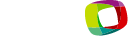

In [3]:
#extrainda dados estruturados de um site.

soup = BeautifulSoup(r.text, 'html.parser')
#print(soup) #irá imprimir todo site em forma de html

print(soup.prettify())

In [4]:
colunas = soup.table.find("thead").find_all("th")

coluna_nome = [c.string for c in colunas]
coluna_nome[0:] = "Posição", "escudo", "Times","Subiu/Desceu", "Pontos", "Jogos", "Vitórias", "Empates", "Derrotas", "GP", "GC", "SG","%"
coluna_nome


linhas = soup.table.find("tbody").find_all("tr")
linhas
l = []
for tr in linhas:
  td = tr.find_all("td")
  row = [str(tr.get_text(strip = True)) for tr in td]
  l.append(row)
    
      
l






[['1',
  '',
  'Internacional>>',
  '',
  '36',
  '20',
  '10',
  '6',
  '4',
  '32',
  '18',
  '14',
  '60'],
 ['2',
  '',
  'Atlético-MG>>',
  'Subiu1',
  '35',
  '19',
  '11',
  '2',
  '6',
  '35',
  '23',
  '12',
  '61'],
 ['3',
  '',
  'Flamengo>>',
  'Desceu1',
  '35',
  '20',
  '10',
  '5',
  '5',
  '33',
  '29',
  '4',
  '58'],
 ['4',
  '',
  'São Paulo>>',
  'Subiu1',
  '33',
  '17',
  '9',
  '6',
  '2',
  '26',
  '15',
  '11',
  '64'],
 ['5',
  '',
  'Fluminense>>',
  'Desceu1',
  '32',
  '20',
  '9',
  '5',
  '6',
  '29',
  '22',
  '7',
  '53'],
 ['6',
  '',
  'Palmeiras>>',
  'Subiu1',
  '31',
  '19',
  '8',
  '7',
  '4',
  '26',
  '20',
  '6',
  '54'],
 ['7',
  '',
  'Santos>>',
  'Desceu1',
  '31',
  '20',
  '8',
  '7',
  '5',
  '28',
  '24',
  '4',
  '51'],
 ['8', '', 'Grêmio>>', '', '30', '19', '7', '9', '3', '22', '17', '5', '52'],
 ['9', '', 'Sport>>', '', '25', '20', '7', '4', '9', '19', '26', '-7', '41'],
 ['10',
  '',
  'Corinthians>>',
  'Subiu1',
  '25',
  '20',


In [5]:

coluna_nome


df = pd.DataFrame(l , columns=coluna_nome)
df



,Posição,escudo,Times,Subiu/Desceu,Pontos,Jogos,Vitórias,Empates,Derrotas,GP,GC,SG,%
0,1,,Internacional>>,,36,20,10,6,4,32,18,14,60
1,2,,Atlético-MG>>,Subiu1,35,19,11,2,6,35,23,12,61
2,3,,Flamengo>>,Desceu1,35,20,10,5,5,33,29,4,58
3,4,,São Paulo>>,Subiu1,33,17,9,6,2,26,15,11,64
4,5,,Fluminense>>,Desceu1,32,20,9,5,6,29,22,7,53
5,6,,Palmeiras>>,Subiu1,31,19,8,7,4,26,20,6,54
6,7,,Santos>>,Desceu1,31,20,8,7,5,28,24,4,51
7,8,,Grêmio>>,,30,19,7,9,3,22,17,5,52
8,9,,Sport>>,,25,20,7,4,9,19,26,-7,41
9,10,,Corinthians>>,Subiu1,25,20,6,7,7,23,27,-4,41


In [6]:
df['Times']

0           Internacional>>
1             Atlético-MG>>
2                Flamengo>>
3               São Paulo>>
4              Fluminense>>
5               Palmeiras>>
6                  Santos>>
7                  Grêmio>>
8                   Sport>>
9             Corinthians>>
10             Fortaleza EC
11                  Ceará>>
12    Atlético Goianiense>>
13                  Bahia>>
14               Coritiba>>
15             Bragantino>>
16               Botafogo>>
17          Vasco da Gama>>
18           Athletico-PR>>
19                  Goiás>>
Name: Times, dtype: object

In [7]:
df.count()

Posição         20
escudo          20
Times           20
Subiu/Desceu    20
Pontos          20
Jogos           20
Vitórias        20
Empates         20
Derrotas        20
GP              20
GC              20
SG              20
%               20
dtype: int64

In [8]:
df

,Posição,escudo,Times,Subiu/Desceu,Pontos,Jogos,Vitórias,Empates,Derrotas,GP,GC,SG,%
0,1,,Internacional>>,,36,20,10,6,4,32,18,14,60
1,2,,Atlético-MG>>,Subiu1,35,19,11,2,6,35,23,12,61
2,3,,Flamengo>>,Desceu1,35,20,10,5,5,33,29,4,58
3,4,,São Paulo>>,Subiu1,33,17,9,6,2,26,15,11,64
4,5,,Fluminense>>,Desceu1,32,20,9,5,6,29,22,7,53
5,6,,Palmeiras>>,Subiu1,31,19,8,7,4,26,20,6,54
6,7,,Santos>>,Desceu1,31,20,8,7,5,28,24,4,51
7,8,,Grêmio>>,,30,19,7,9,3,22,17,5,52
8,9,,Sport>>,,25,20,7,4,9,19,26,-7,41
9,10,,Corinthians>>,Subiu1,25,20,6,7,7,23,27,-4,41


In [9]:
#Removendo a caluna escudo


df = df.drop(columns=['escudo'])



In [10]:
#Alterando os tipos das colunas.

df.astype({'Posição':'int64', 'Times':'string', 'Pontos': 'int', 'Jogos':'int','Vitórias':'int', 'Derrotas':'int', 'Empates':'int', 'GP':'int', 'GC':'int', 'SG':'int', '%':'float'}).dtypes


Posição           int64
Times            string
Subiu/Desceu     object
Pontos            int64
Jogos             int64
Vitórias          int64
Empates           int64
Derrotas          int64
GP                int64
GC                int64
SG                int64
%               float64
dtype: object

In [11]:
df

,Posição,Times,Subiu/Desceu,Pontos,Jogos,Vitórias,Empates,Derrotas,GP,GC,SG,%
0,1,Internacional>>,,36,20,10,6,4,32,18,14,60
1,2,Atlético-MG>>,Subiu1,35,19,11,2,6,35,23,12,61
2,3,Flamengo>>,Desceu1,35,20,10,5,5,33,29,4,58
3,4,São Paulo>>,Subiu1,33,17,9,6,2,26,15,11,64
4,5,Fluminense>>,Desceu1,32,20,9,5,6,29,22,7,53
5,6,Palmeiras>>,Subiu1,31,19,8,7,4,26,20,6,54
6,7,Santos>>,Desceu1,31,20,8,7,5,28,24,4,51
7,8,Grêmio>>,,30,19,7,9,3,22,17,5,52
8,9,Sport>>,,25,20,7,4,9,19,26,-7,41
9,10,Corinthians>>,Subiu1,25,20,6,7,7,23,27,-4,41
